In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [23]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# Step 1: Handle Categorical Data (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [27]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [29]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

C:\Users\student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

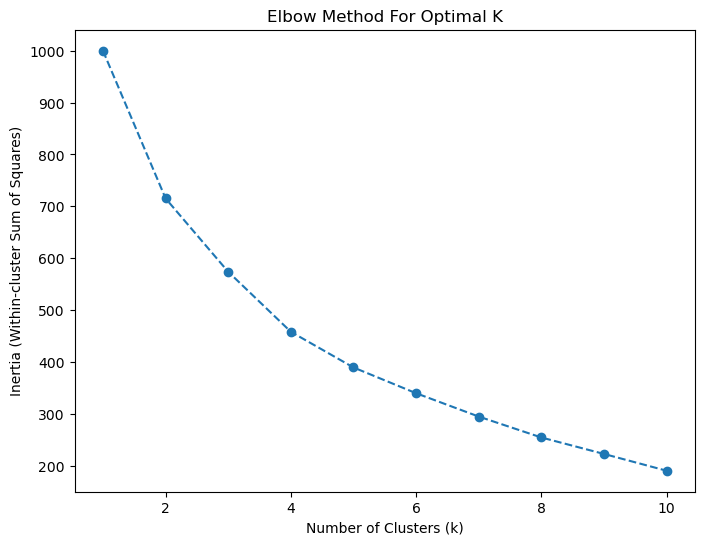

In [31]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

C:\Users\student\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


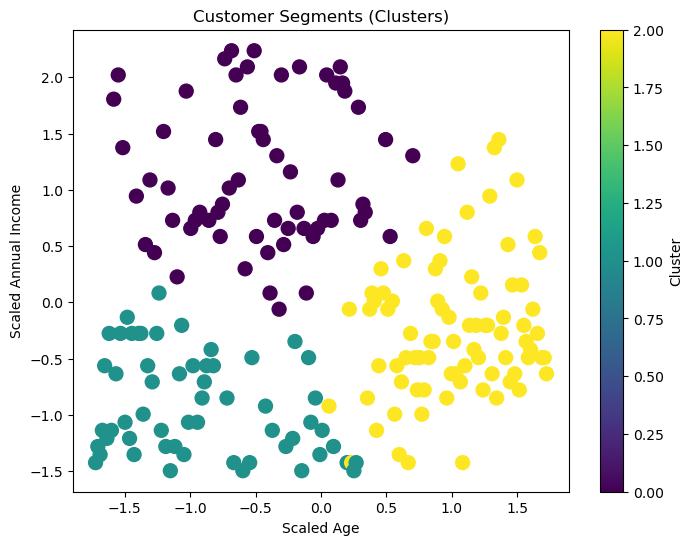

In [41]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segments (Clusters)')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)
df_clustered = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(df_clustered)

Cluster Centers (scaled):
[[-0.47192101  1.13852727 -0.42245682 -0.37379617  0.04093069]
 [-0.91571936 -0.91464757 -0.88052186  0.29940277 -0.17954301]
 [ 1.02408784 -0.24490383  0.96005657  0.08104001  0.09569148]]
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        1
1     21                  15                      81        1
2     20                  16                       6        1
3     23                  16                      77        1
4     31                  17                      40        1
..   ...                 ...                     ...      ...
195   35                 120                      79        2
196   45                 126                      28        2
197   32                 126                      74        2
198   32                 137                      18        2
199   30                 137                      83        2

[200 rows x 4 columns]


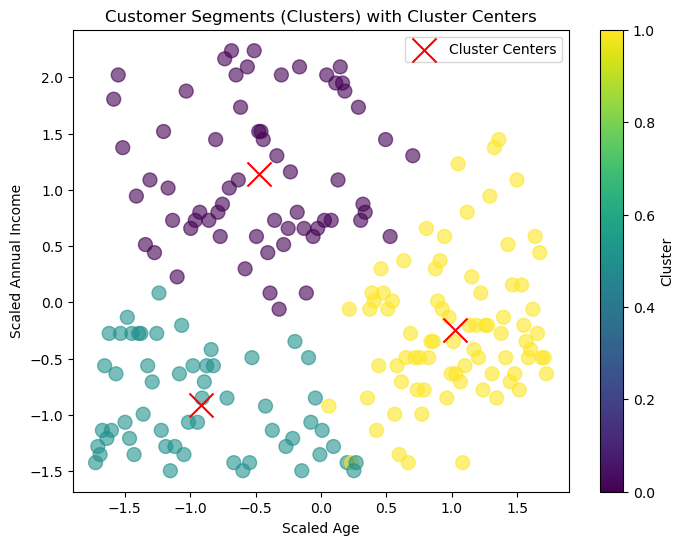

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)
cluster_centers = kmeans.cluster_centers_

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x', label='Cluster Centers')

plt.title('Customer Segments (Clusters) with Cluster Centers')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.colorbar(label='Cluster')

plt.legend()
plt.show()
